In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(20), (20,40,20), (20,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init' : [0.0001, 0.0005, 0.001],
    'max_iter' : [100, 1000, 10000]
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y)

/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [20, (20, 40, 20), (20, 10)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive'], 'learning_rate_init': [0.0001, 0.0005, 0.001], 'max_iter': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [6]:
clf.best_estimator_

MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='adaptive',
       learning_rate_init=0.0005, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [7]:
from sklearn.model_selection import RepeatedKFold

scores = []

rkf = RepeatedKFold(n_splits=5, n_repeats=2)
for train, test in rkf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    
    nn = clf.best_estimator_
    nn.fit(X_train, y_train)
    scores.append((nn.score(X_test, y_test)))
    
scores = np.array(scores)
    
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.05)


In [12]:
from sklearn.model_selection import cross_val_score

nn = clf.best_estimator_
scores = cross_val_score(nn, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.04)


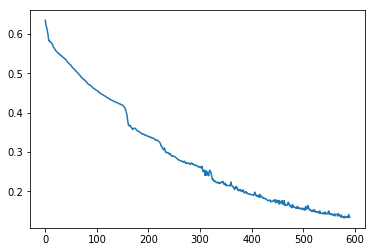

In [13]:
import matplotlib.pyplot as plt

plt.plot(nn.loss_curve_)
plt.show()